### 1. Importing libraries and reading dataframe
We import: Pandas, Seaborn, Matplotlib, and Numpy to create our visualizations. We also read the dataframe while renaming some of the columns so that they're more distinct.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("MERGED_DATASET_WITH_NAN_AQI.csv", dtype={"FIPS": str})
df.rename(columns={"2019_average": "Average House Price", "RISK_SCORE": "National (Environmental) Risk Index"}, inplace=True)
df.head()

,County Name/State Abbreviation,FIPS,Unemployment Rate (%),Average House Price,National (Environmental) Risk Index,Median AQI
0,"Autauga County, AL",01001,2.9,174083.04224,49.22049,NaN
1,"Baldwin County, AL",01003,2.9,243990.89015,97.70920,40.0
2,"Barbour County, AL",01005,4.0,111670.71262,56.18836,NaN
3,"Bibb County, AL",01007,3.2,139558.27920,32.48489,NaN
4,"Blount County, AL",01009,2.8,163299.14116,65.12886,NaN


### 1.1 Introducing Log Transformation
Because the house price data is heavily right-skewed, I am applying a log-transformation to it in order to make EDA and Hypothesis Testing easier. This will be further explained in the report. Afterwards columns are reordered to make more sense.

In [19]:
df["Log-transformed House Price"] = np.log10(df["Average House Price"])

df = df[["County Name/State Abbreviation","FIPS","Average House Price","Log-transformed House Price","Unemployment Rate (%)","National (Environmental) Risk Index","Median AQI"]]

df.head()

,County Name/State Abbreviation,FIPS,Average House Price,Log-transformed House Price,Unemployment Rate (%),National (Environmental) Risk Index,Median AQI
0,"Autauga County, AL",01001,174083.04224,5.240756,2.9,49.22049,NaN
1,"Baldwin County, AL",01003,243990.89015,5.387374,2.9,97.70920,40.0
2,"Barbour County, AL",01005,111670.71262,5.047939,4.0,56.18836,NaN
3,"Bibb County, AL",01007,139558.27920,5.144756,3.2,32.48489,NaN
4,"Blount County, AL",01009,163299.14116,5.212984,2.8,65.12886,NaN


### 2. Numerical data
The .describe() method gives us some numbers we can do preliminary analysis with. These include the number of rows, their mean, standard deviation, and the min-max, and the quartiles.

In [20]:
df.describe()

,Average House Price,Log-transformed House Price,Unemployment Rate (%),National (Environmental) Risk Index,Median AQI
count,3.004000e+03,3004.000000,3004.000000,3004.000000,995.000000
mean,1.715939e+05,5.175414,3.933522,51.660687,39.351759
std,1.137513e+05,0.213804,1.385371,28.297892,9.678165
min,2.542376e+04,4.405240,1.300000,0.095450,2.000000
25%,1.075076e+05,5.031439,3.000000,27.545338,36.000000
50%,1.438145e+05,5.157803,3.700000,52.068090,40.000000
75%,2.002442e+05,5.301560,4.600000,76.113585,45.000000
max,1.797555e+06,6.254682,20.700000,100.000000,81.000000


### 3. Drawing Histograms
We draw a histogram for each variable to see their distribution.

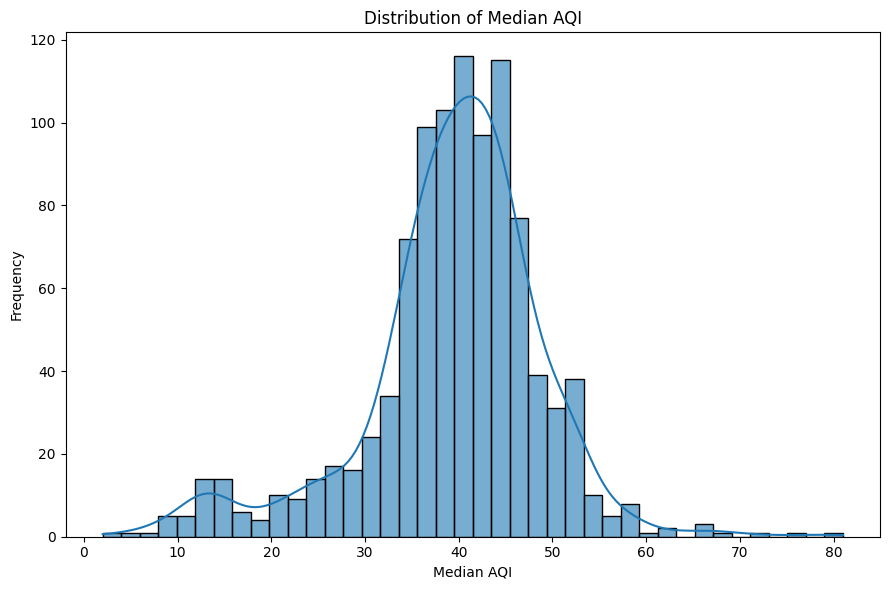

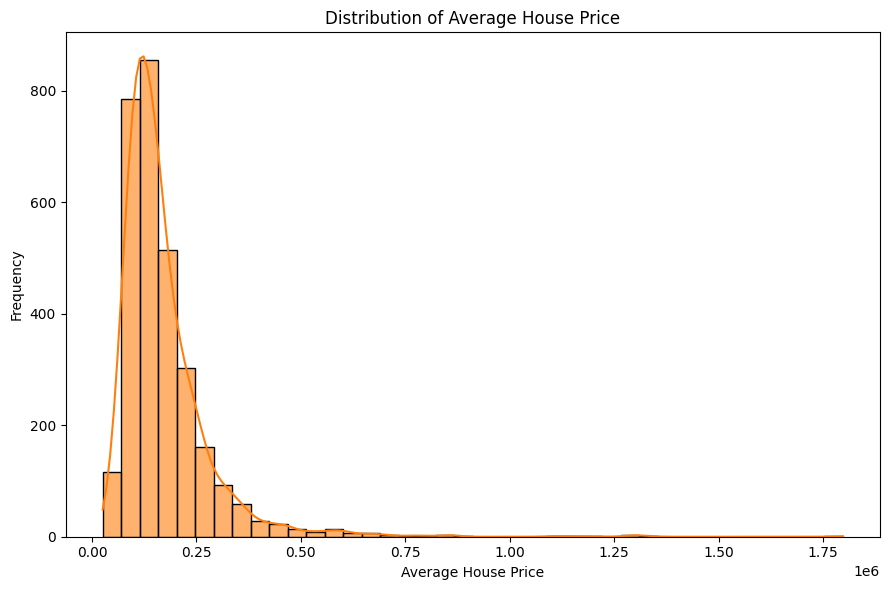

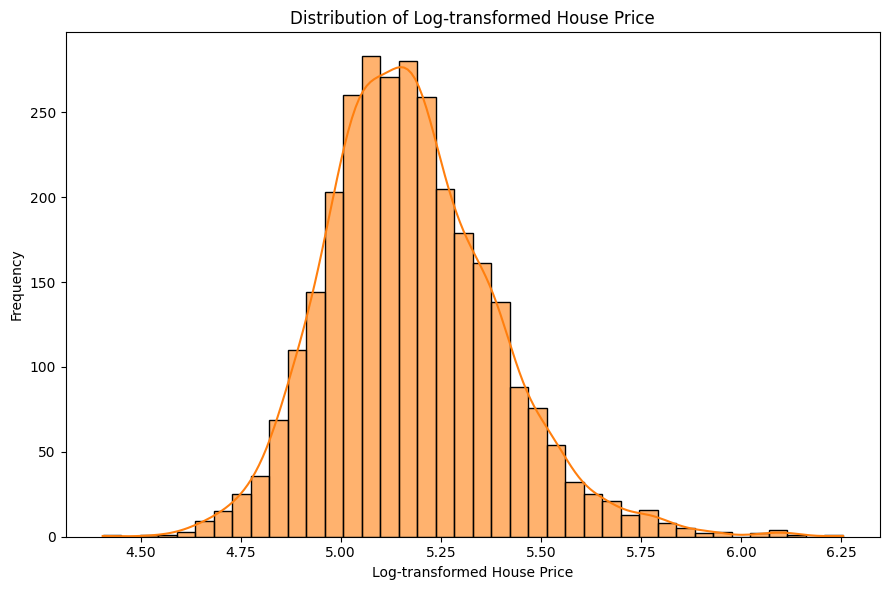

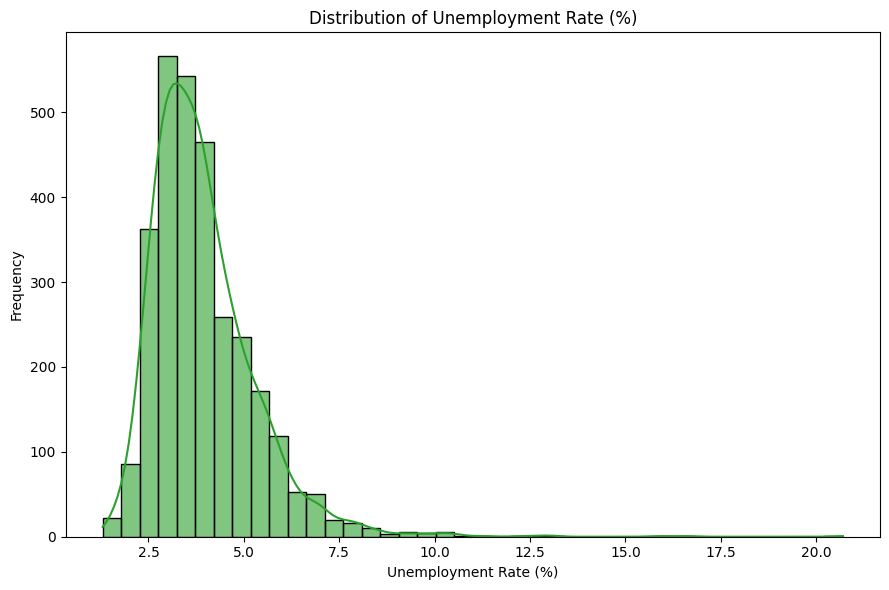

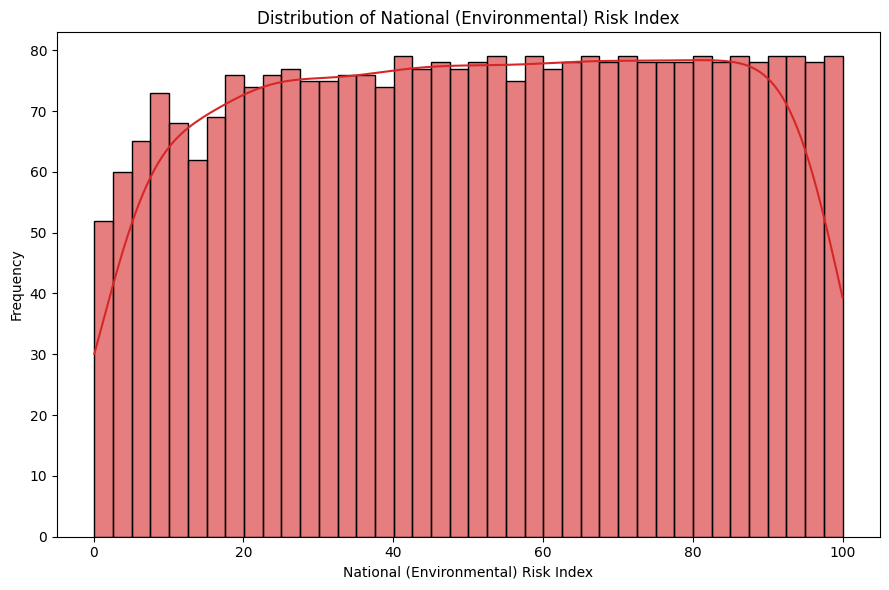

In [21]:
columns = ["Median AQI", "Average House Price","Log-transformed House Price", "Unemployment Rate (%)", "National (Environmental) Risk Index"]
colors = ["tab:blue","tab:orange","tab:orange","tab:green","tab:red"]
count = -1
for col in columns:
    count += 1
    plt.figure(figsize=(9,6))
    sns.histplot(df[col], color=colors[count],bins=40,kde=True,alpha=0.6)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

### 4. Drawing Scatter Plots
We draw scatter plots, comparing each predictor variable (AQI, Unemployment Rate, and National Risk Index) to our main variable of interest, house prices.

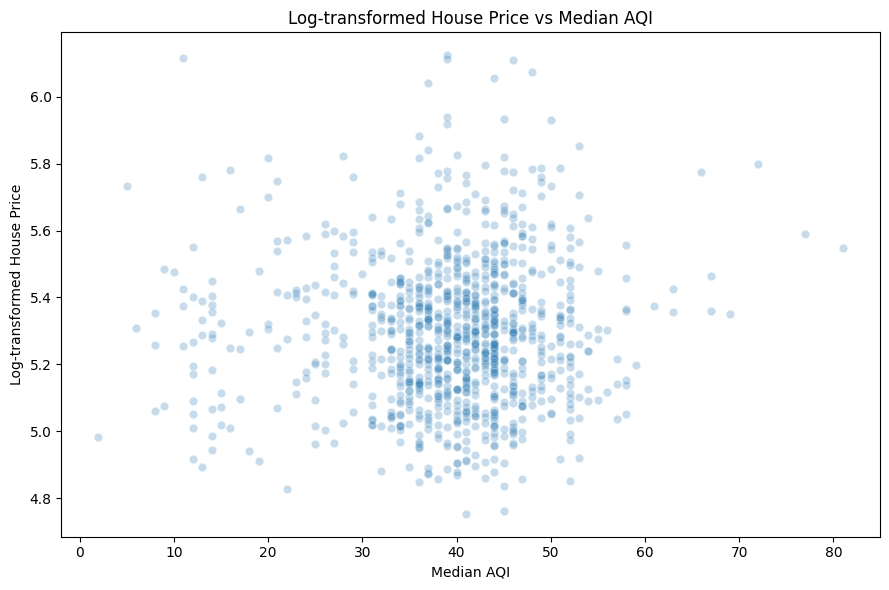

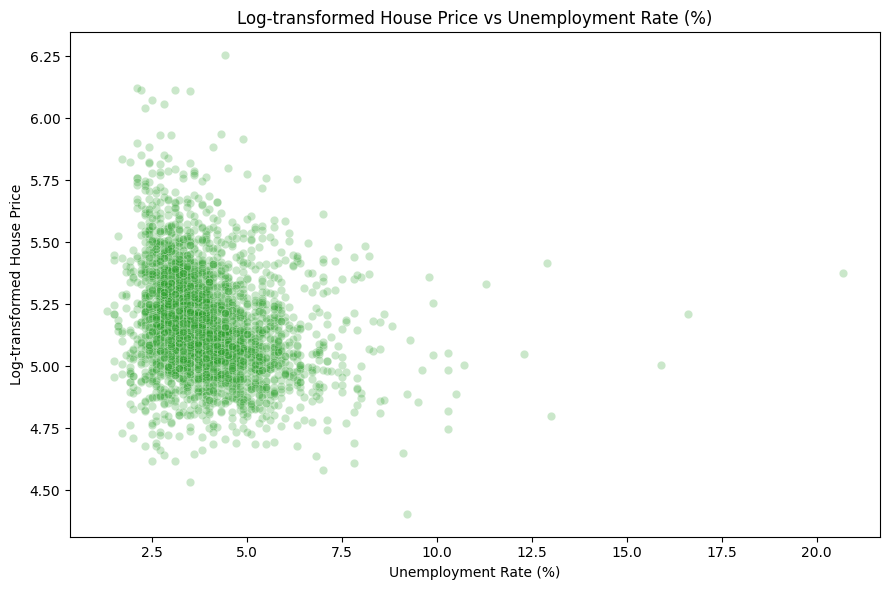

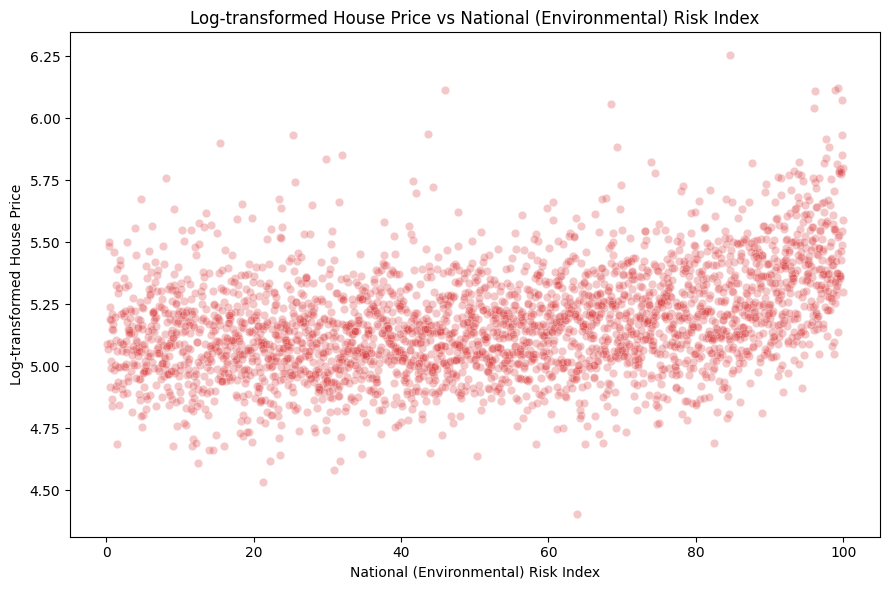

In [22]:
predictors = ['Median AQI', 'Unemployment Rate (%)', 'National (Environmental) Risk Index']
colors = ["tab:blue","tab:green","tab:red"]
count = -1
for col in predictors:
    count += 1
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x=df[col], y=df['Log-transformed House Price'],alpha=0.25 ,color=colors[count])
    plt.title(f'Log-transformed House Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Log-transformed House Price')
    plt.tight_layout()
    plt.show()

### 5. Obtain Correlation Matrix
A simple heatmap can show us the correlation of every variable with each other, which is what we're interested in.

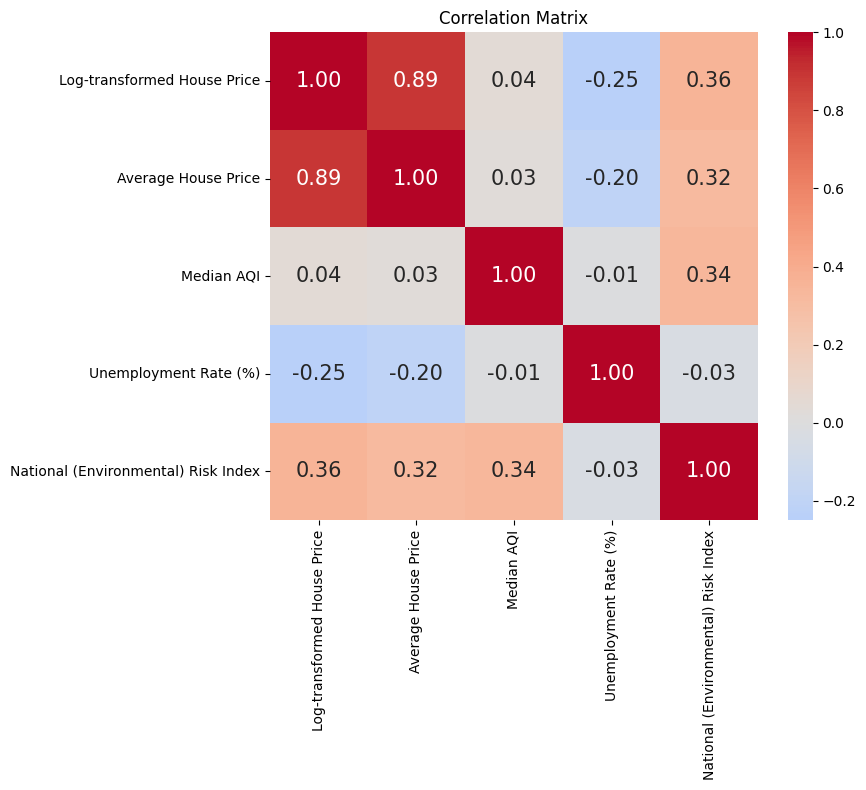

In [45]:
plt.figure(figsize=(9, 8))
sns.heatmap(df[["Log-transformed House Price","Average House Price","Median AQI", "Unemployment Rate (%)","National (Environmental) Risk Index"]].corr(), annot=True, annot_kws={'size': 15} ,cmap='coolwarm',center=0 ,fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### 6. Obtain Boxplots
We draw a boxplot for each variable to better see how they're distributed and the show any outliers.

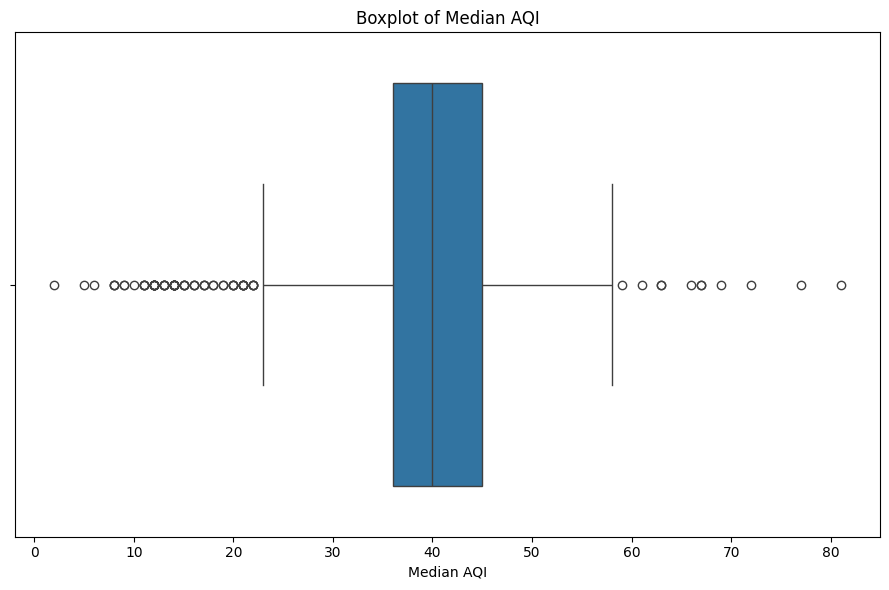

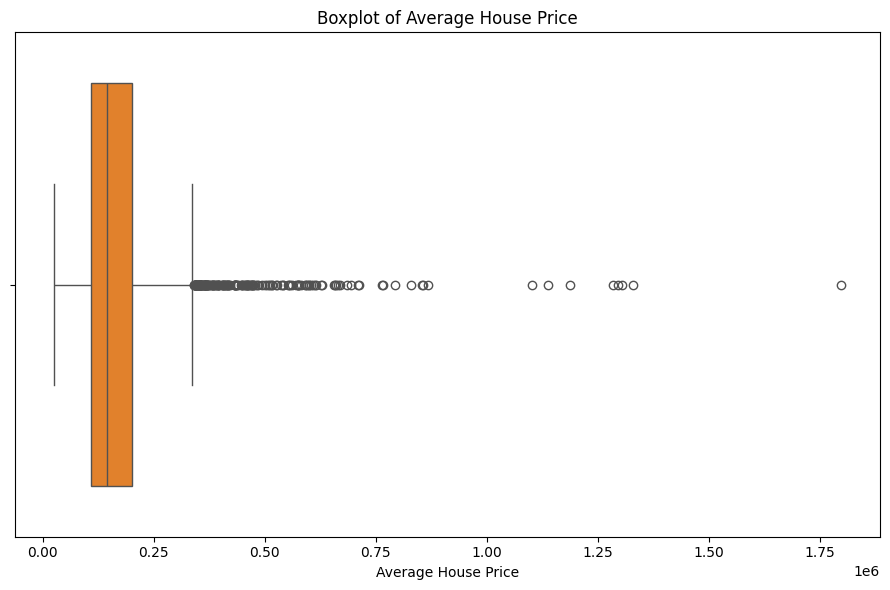

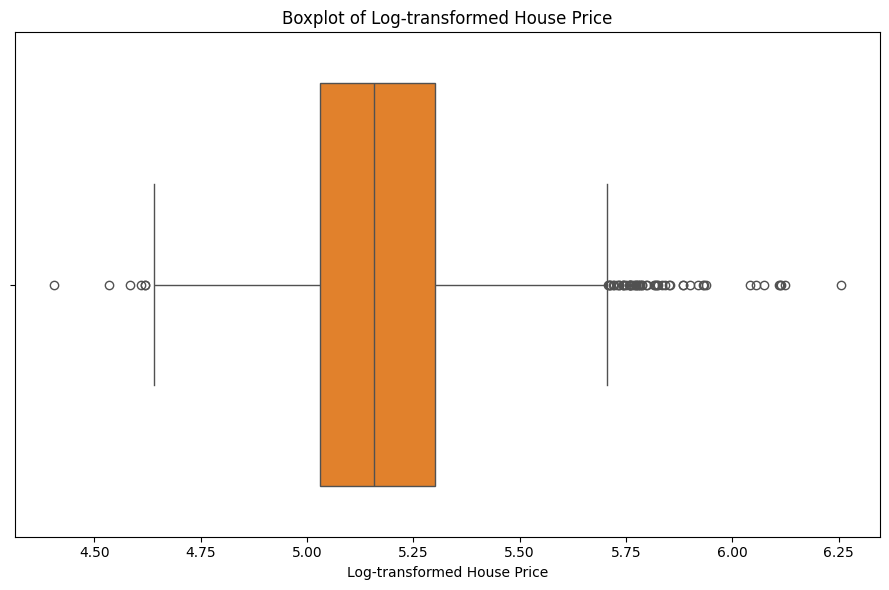

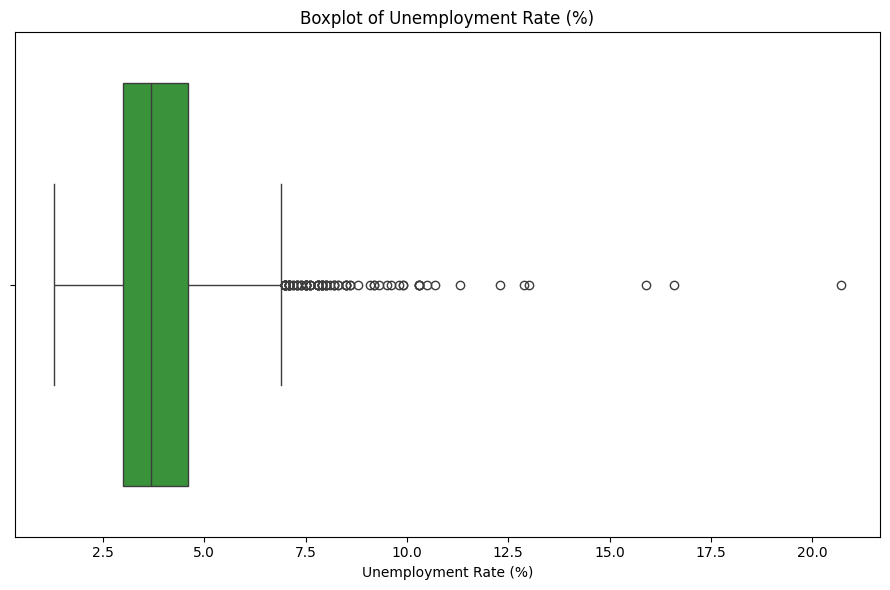

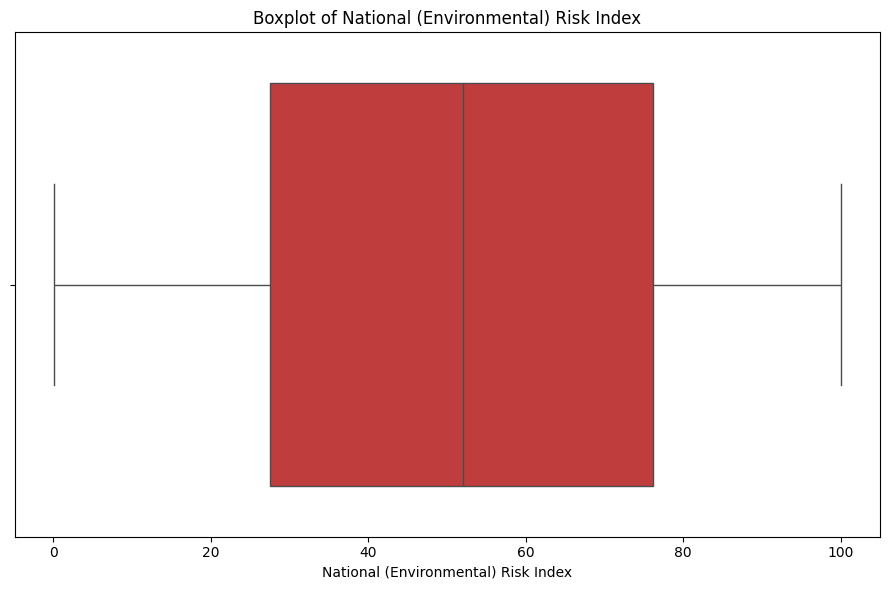

In [24]:
colors = ["tab:blue","tab:orange","tab:orange","tab:green","tab:red"]
count = -1
for col in columns:
    count += 1
    plt.figure(figsize=(9, 6))
    sns.boxplot(x=df[col], color=colors[count])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()